In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stacked_bar(data, series_labels, bar_width = 0.2, num_sections = 0, category_labels=None, 
                     y_label=None, x_label=None, colors=None, grid=True, title = "", annotate=True, rotate=False):
    fig = plt.figure(figsize=(8, 4))
    original = data.copy()

    ny = len(data[0])
    num_groups = int(len(data) / num_sections)

    ind = list(range(ny))

    axes = []
    cum_sizes = []
    for i in range(num_groups):
        cum_sizes.append(np.zeros(ny))

    data = np.array(data)
    index = np.arange(ny)

    for i in range(len(cum_sizes)):
        for j in range(num_sections):
            if num_sections == 2:
                idx = 2 * i + j
            else:
                idx = 2 * i + j + (0 if i == 0 else 1)
            cur_data = data[idx]
            if i == 0:
                bar_offset = 0 if num_groups == 1 else i * bar_width - bar_width / 2 - 0.05
                axes.append(plt.bar(index + bar_offset, cur_data, bar_width, bottom=cum_sizes[i], label=series_labels[j], color=colors[j]))
            else:
                bar_offset = 0 if num_groups == 1 else i * bar_width - bar_width / 2 + 0.05
                axes.append(plt.bar(index + bar_offset, cur_data, bar_width, bottom=cum_sizes[i], color=colors[j]))
            cum_sizes[i] += cur_data

    if category_labels:
        plt.xticks(ind, category_labels, rotation=0 if not rotate else 315)

    if y_label:
        plt.ylabel(y_label)

    if x_label:
        plt.xlabel(x_label)

    plt.legend()
    plt.title(title)

    if grid:
        plt.grid(linewidth=1, alpha=0.2)

    if annotate:
        first_bar = axes[4][0]
        first_w = first_bar.get_width() 
        first_h = first_bar.get_height()
        fig.axes[0].annotate('Benchmark',
                xy=(first_w / 9 - first_w, first_h * 4.5),
                xycoords='data',
                xytext=(first_bar.get_x(),75),
                textcoords='offset points',
                arrowprops=dict(headwidth=5, width=1, color='#363d46'), #, connectionstyle="angle3,angleA=0,angleB=-90"),
                fontsize=8)
        snd_bar = axes[5][0]
        snd_w = snd_bar.get_width() 
        fig.axes[0].annotate('App',
                xy=(snd_w / 1.1, cum_sizes[0][-1] * 1.25),
                xycoords='data',
                xytext=(snd_bar.get_x(), 40),
                textcoords='offset points',
                arrowprops=dict(headwidth=5, width=1, color='#363d46'), #, connectionstyle="angle3,angleA=0,angleB=-90"),
                fontsize=8)
    return [cum_sizes, axes, fig]


def plot_bars(data, series_labels, bar_width = 0.2, category_labels=None, 
                     y_label=None, x_label=None, colors=None, grid=True, title = "", annotate=True, rotate=False):
    fig = plt.figure(figsize=(8, 4))
    original = data.copy()

    ny = len(data[0])
    num_groups = int(len(data))

    ind = list(range(ny))

    axes = []

    data = np.array(data)
    index = np.arange(ny)

    for j in range(num_groups):
        cur_data = data[j]
        if j == 0:
            bar_offset = 0 if num_groups == 1 else j * bar_width - bar_width
        elif j == 1 and num_groups == 3:
            bar_offset = 0
        else:
            bar_offset = 0 if num_groups == 1 else j * bar_width - bar_width

        axes.append(plt.bar(index + bar_offset, cur_data, bar_width, color=colors[j], label=series_labels[j]))

    if category_labels:
        plt.xticks(ind, category_labels, rotation=0 if not rotate else 315)

    if y_label:
        plt.ylabel(y_label)

    if x_label:
        plt.xlabel(x_label)

    plt.legend()
    plt.title(title)

    if grid:
        plt.grid(linewidth=1, alpha=0.2)

0   2
0   2
0   2
1   2
1   2
1   2


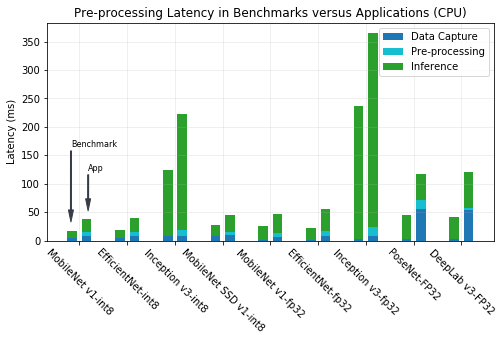

In [18]:
series_labels = ['Data Capture', 'Pre-processing', 'Inference']

inf_bench = [
12.88,
13.686,
116.485,
19.045,
24.412,
21.269,
233.567,
42.458,
39.928
]
inf_apps = [
22.99,
24.94,
202.83,
30.94,
31.81,
38.31,
341.25,
46.01,
63
]
pp_bench = [
0,
0,
0,
0,
0,
0,
0,
0,
0
]
pp_apps = [
7.27,
7.11,
11.76,
5.46,
8.05,
9.32,
15.57,
15.96,
4
]
cap_bench = [
4.713,
4.832,
8.114,
8.113,
1.427,
1.521,
2.66,
2.057,
1.928
]
cap_apps =[
7.41,
7.37,
7.43,
9,
6.04,
8.22,
7.54,
55.32,
53
]

data = [
    # Group 1
    cap_bench,
    pp_bench,
    inf_bench,
    
    # Group 2
    cap_apps,
    pp_apps,
    inf_apps,
]

category_labels = [
'MobileNet v1-int8',
'EfficientNet-int8',
'Inception v3-int8',
'MobileNet SSD v1-int8',
'MobileNet v1-fp32',
'EfficientNet-fp32',
'Inception v3-fp32',
'PoseNet-FP32',
'DeepLab v3-FP32'
]

plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 3,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan', 'tab:green'],
    y_label="Latency (ms)",
    title = "Pre-processing Latency in Benchmarks versus Applications (CPU)",
    rotate = True
)

plt.savefig('bench_vs_apps.png', bbox_inches = "tight", dpi=300)
plt.show()

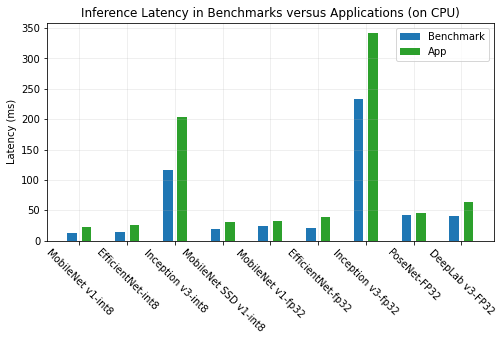

In [123]:
series_labels = ['Benchmark', 'App']

inf_bench = [
12.88,
13.686,
116.485,
19.045,
24.412,
21.269,
233.567,
42.458,
39.928
]
inf_apps = [
22.99,
24.94,
202.83,
30.94,
31.81,
38.31,
341.25,
46.01,
63
]

data = [
    # Group 1
    inf_bench,
    
    # Group 2
    inf_apps,
]

category_labels = [
'MobileNet v1-int8',
'EfficientNet-int8',
'Inception v3-int8',
'MobileNet SSD v1-int8',
'MobileNet v1-fp32',
'EfficientNet-fp32',
'Inception v3-fp32',
'PoseNet-FP32',
'DeepLab v3-FP32'
]

plot_bars(
    data, 
    series_labels,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:green'],
    y_label="Latency (ms)",
    title = "Inference Latency in Benchmarks versus Applications (on CPU)",
    rotate = True
)

plt.savefig('bench_vs_apps_inference.png', bbox_inches = "tight", dpi=300)
plt.show()

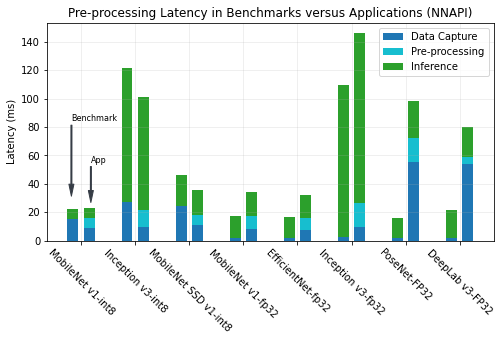

In [107]:
series_labels = ['Data Capture', 'Pre-processing', 'Inference']

inf_bench = [
6.964,
95.016,
21.734,
15.532,
14.697,
106.678,
14.716,
19.524
]
inf_apps = [
6.94,
80.06,
17.58,
16.89,
16.16,
119.69,
26.19,
21
]
pp_bench = [
0,
0,
0,
0,
0,
0,
0,
0
]
pp_apps = [
6.95,
12,
6.99,
8.72,
8.49,
16.54,
17.21,
5
]
cap_bench = [
14.947,
26.925,
24.261,
1.486,
1.554,
2.797,
1.474,
1.923
]
cap_apps =[
8.73,
9.27,
10.79,
8.44,
7.71,
9.81,
55.28,
54
]

data = [
    # Group 1
    cap_bench,
    pp_bench,
    inf_bench,
    
    # Group 2
    cap_apps,
    pp_apps,
    inf_apps,
]

category_labels = [
'MobileNet v1-int8',
'Inception v3-int8',
'MobileNet SSD v1-int8',
'MobileNet v1-fp32',
'EfficientNet-fp32',
'Inception v3-fp32',
'PoseNet-FP32',
'DeepLab v3-FP32'
]

plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 3,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan', 'tab:green'],
    y_label="Latency (ms)",
    title = "Pre-processing Latency in Benchmarks versus Applications (NNAPI)",
    rotate = True
)

plt.savefig('preproc_bottleneck.png', bbox_inches = "tight", dpi=250)
plt.show()

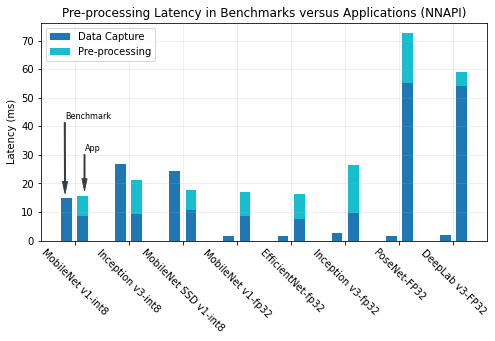

In [187]:
series_labels = ['Data Capture', 'Pre-processing']

pp_bench = [
0,
0,
0,
0,
0,
0,
0,
0
]
pp_apps = [
6.95,
12,
6.99,
8.72,
8.49,
16.54,
17.21,
5
]
cap_bench = [
14.947,
26.925,
24.261,
1.486,
1.554,
2.797,
1.474,
1.923
]
cap_apps =[
8.73,
9.27,
10.79,
8.44,
7.71,
9.81,
55.28,
54
]

data = [
    # Group 1
    cap_bench,
    pp_bench,
    
    # Group 2
    cap_apps,
    pp_apps
]

category_labels = [
'MobileNet v1-int8',
'Inception v3-int8',
'MobileNet SSD v1-int8',
'MobileNet v1-fp32',
'EfficientNet-fp32',
'Inception v3-fp32',
'PoseNet-FP32',
'DeepLab v3-FP32'
]

cum_sizes, axes, fig = plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 2,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan'],
    y_label="Latency (ms)",
    title = "Pre-processing Latency in Benchmarks versus Applications (NNAPI)",
    rotate = True,
    annotate = False
)

first_bar = axes[0][0]
first_w = first_bar.get_width() 
first_h = first_bar.get_height()
fig.axes[0].annotate('Benchmark',
        xy=(first_w / 9 - first_w, first_h * 1.1),
        xycoords='data',
        xytext=(first_bar.get_x(),75),
        textcoords='offset points',
        arrowprops=dict(headwidth=5, width=1, color='#363d46'), #, connectionstyle="angle3,angleA=0,angleB=-90"),
        fontsize=8)
snd_bar = axes[2][0]
snd_w = snd_bar.get_width()
snd_h = snd_bar.get_height()
fig.axes[0].annotate('App',
        xy=(snd_w / 1.1, snd_h * 2),
        xycoords='data',
        xytext=(snd_bar.get_x(), 40),
        textcoords='offset points',
        arrowprops=dict(headwidth=5, width=1, color='#363d46'), #, connectionstyle="angle3,angleA=0,angleB=-90"),
        fontsize=8)

plt.savefig('preproc_bottleneck_no_inference.png', bbox_inches = "tight", dpi=250)
plt.show()

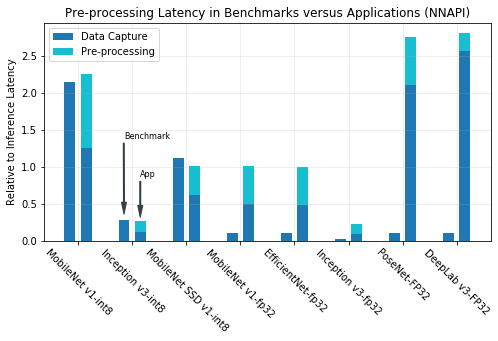

In [45]:
series_labels = ['Data Capture', 'Pre-processing']

inf_bench = [
6.964,
95.016,
21.734,
15.532,
14.697,
106.678,
14.716,
19.524
]
inf_apps = [
6.94,
80.06,
17.58,
16.89,
16.16,
119.69,
26.19,
21
]
pp_bench = [
0,
0,
0,
0,
0,
0,
0,
0
]
pp_apps = [
6.95,
12,
6.99,
8.72,
8.49,
16.54,
17.21,
5
]
cap_bench = [
14.947,
26.925,
24.261,
1.486,
1.554,
2.797,
1.474,
1.923
]
cap_apps =[
8.73,
9.27,
10.79,
8.44,
7.71,
9.81,
55.28,
54
]

def div(a,b):
    return a / b

data = [
    # Group 1
    list(map(div, cap_bench, inf_bench)),
    list(map(div, pp_bench, inf_bench)),
    
    # Group 2
    list(map(div, cap_apps, inf_apps)),
    list(map(div, pp_apps, inf_apps))
]

category_labels = [
'MobileNet v1-int8',
'Inception v3-int8',
'MobileNet SSD v1-int8',
'MobileNet v1-fp32',
'EfficientNet-fp32',
'Inception v3-fp32',
'PoseNet-FP32',
'DeepLab v3-FP32'
]

cum_sizes, axes, fig = plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 2,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan'],
    y_label="Relative to Inference Latency",
    title = "Pre-processing Latency in Benchmarks versus Applications (NNAPI)",
    rotate = True,
    annotate = False
)

first_bar = axes[0][0]
first_w = first_bar.get_width() 
first_h = first_bar.get_height()
fig.axes[0].annotate('Benchmark',
        xy=(first_w + 0.65, first_h / 6),
        xycoords='data',
        xytext=(first_bar.get_x(),75),
        textcoords='offset points',
        arrowprops=dict(headwidth=5, width=1, color='#363d46'), #, connectionstyle="angle3,angleA=0,angleB=-90"),
        fontsize=8)
snd_bar = axes[2][0]
snd_w = snd_bar.get_width()
snd_h = snd_bar.get_height()
fig.axes[0].annotate('App',
        xy=(snd_w + 0.95, snd_h / 4),
        xycoords='data',
        xytext=(snd_bar.get_x(), 40),
        textcoords='offset points',
        arrowprops=dict(headwidth=5, width=1, color='#363d46'), #, connectionstyle="angle3,angleA=0,angleB=-90"),
        fontsize=8)

plt.savefig('preproc_bottleneck_no_inference_relative.png', bbox_inches = "tight", dpi=250)
plt.show()

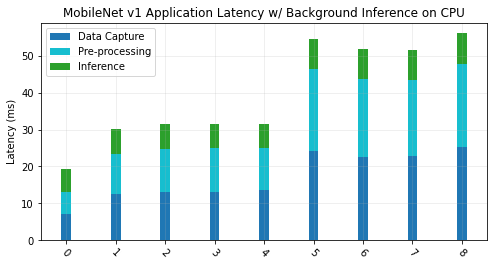

In [14]:
series_labels = ['Data Capture', 'Pre-processing', 'Inference']

cap = [
7.03,
12.46,
13.04,
13.15,
13.51,
24.18428571,
22.62571429,
22.8,
25.25133333
]
inf = [
6.28,
6.72,
6.72,
6.64,
6.64,
8.204285714,
8.118571429,
8.252307692,
8.292666667
]
pp = [
5.93,
10.86,
11.74,
11.84,
11.46,
22.12142857,
21.10571429,
20.58615385,
22.624
]

data = [
    # Group 1
    cap,
    pp,
    inf,
]

category_labels = [
0,
1,
2,
3,
4,
5,
6,
7,
8
]

plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 3,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan', 'tab:green'],
    y_label="Latency (ms)",
    x_label="Number of Scheduled Processes",
    title = "MobileNet v1 Application Latency w/ Background Inference on CPU",
    annotate=False
)

plt.savefig('background_inference_mobilenet_cpu.png', bbox_inches = "tight", dpi=250)
plt.show()

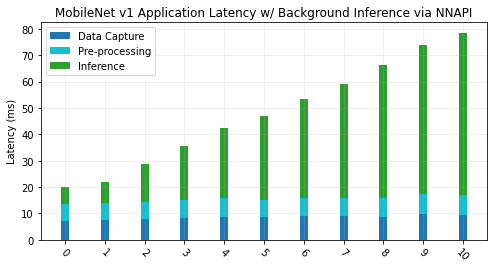

In [18]:
series_labels = ['Data Capture', 'Pre-processing', 'Inference']

cap = [
7.26,
7.33,
7.93,
8.44,
8.68,
8.59,
9.13,
8.88,
8.76,
9.71,
9.29,
#9.88
]
inf = [
6.28,
7.98,
14.47,
20.44,
26.8,
31.6,
37.5,
43.38,
50.39,
56.54,
61.5,
#94.66
]
pp = [
6.33,
6.48,
6.41,
6.62,
7.05,
6.66,
6.78,
6.86,
7.16,
7.68,
7.76,
#7.61
]

data = [
    # Group 1
    cap,
    pp,
    inf,
]

category_labels = [
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
#16
]

plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 3,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan', 'tab:green'],
    y_label="Latency (ms)",
    x_label="Number of Scheduled Processes",
    title = "MobileNet v1 Application Latency w/ Background Inference via NNAPI",
    annotate=False
)

plt.savefig('background_inference_mobilenet_nnapi.png', bbox_inches = "tight", dpi=250)
plt.show()

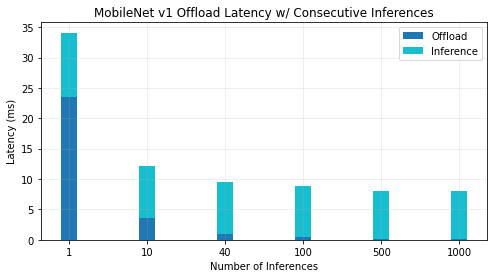

In [10]:
series_labels = ['Offload', 'Inference']

off = [
23.56333333,
3.5835,
0.9974,
0.53,
0.188,
0.159,
#0.141
]
inf = [
10.51883333,
8.573333333,
8.5462,
8.35,
7.835,
7.817,
#7.805
]

data = [
    # Group 1
    off,
    inf,
]

category_labels = [
1,
10,
40,
100,
500,
1000,
#2000
]

plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 2,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan', 'tab:green'],
    y_label="Latency (ms)",
    x_label="Number of Inferences",
    title = "MobileNet v1 Offload Latency w/ Consecutive Inferences",
    annotate=False,
    rotate=False
)

plt.savefig('offload_amortized_mobilenet_quant.png', bbox_inches = "tight", dpi=250)
plt.show()

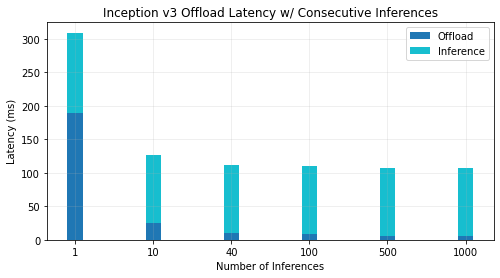

In [12]:
series_labels = ['Offload', 'Inference']

off_nnapi = [
188.8941667,
24.57775,
10.76666667,
8.0105,
6.23,
6.121,
#6.03
]
inf_nnapi = [
120.4188333,
101.53175,
101.6136667,
102.4285,
100.912,
101.492,
#101.054
]
off_dsp = [
38.86166667,
4.829,
2.838,
2.1,
1.7,
1.742,
#1.69
]
inf_dsp = [
139.3991667,
104.5836667,
106.7656667,
103.726,
101.235,
103.061,
#102.683
]

data = [
    # Group 1
    off_nnapi,
    inf_nnapi,

    # Group 2
    # off_dsp,
    # inf_dsp
]

category_labels = [
1,
10,
40,
100,
500,
1000,
#2000
]

plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 2,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan'],
    y_label="Latency (ms)",
    x_label="Number of Inferences",
    title = "Inception v3 Offload Latency w/ Consecutive Inferences",
    annotate=False,
    rotate=False
)

plt.savefig('offload_amortized_inception_v3_quant_nnapi.png', bbox_inches = "tight", dpi=250)
plt.show()

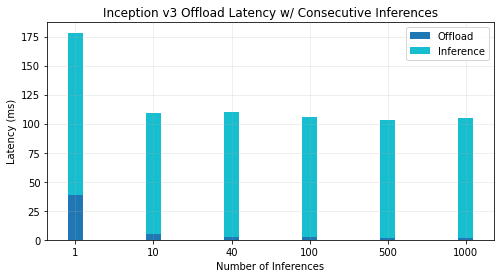

In [13]:
series_labels = ['Offload', 'Inference']

off_nnapi = [
188.8941667,
24.57775,
10.76666667,
8.0105,
6.23,
6.121,
#6.03
]
inf_nnapi = [
120.4188333,
101.53175,
101.6136667,
102.4285,
100.912,
101.492,
#101.054
]
off_dsp = [
38.86166667,
4.829,
2.838,
2.1,
1.7,
1.742,
#1.69
]
inf_dsp = [
139.3991667,
104.5836667,
106.7656667,
103.726,
101.235,
103.061,
#102.683
]

data = [
    # Group 1
    # off_nnapi,
    # inf_nnapi,

    # Group 2
    off_dsp,
    inf_dsp
]

category_labels = [
1,
10,
40,
100,
500,
1000,
#2000
]

plot_stacked_bar(
    data, 
    series_labels,
    num_sections = 2,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:cyan'],
    y_label="Latency (ms)",
    x_label="Number of Inferences",
    title = "Inception v3 Offload Latency w/ Consecutive Inferences",
    annotate=False,
    rotate=False
)

plt.savefig('offload_amortized_inception_v3_quant_nnapi_dsp.png', bbox_inches = "tight", dpi=250)
plt.show()

In [21]:
# Quantized MobileNet v1

import csv

def fill_from_csv(filename, predicate = (lambda arr : arr)):
    ret = []
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            ret.append(predicate(row))
    return ret

def get_perc_dev_from_mean(data):
    mean = sum(data) / len(data)
    diffs = []
    for i in data:
        perc_diff = (i - mean) / mean
        diffs.append(perc_diff * 100)

    return diffs

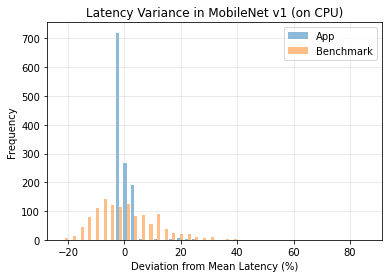

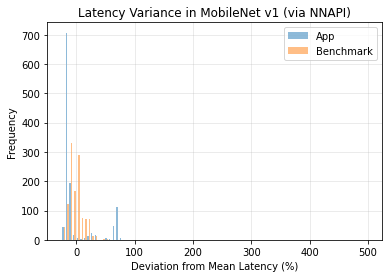

In [68]:
'''
tflite_bench_mobilenet_v1_1.0_224_quant_cpu.csv
tflite_bench_mobilenet_v1_1.0_224_quant_nnapi.csv

mobilenet_v1_1.0_224_quant.tflite_nnapi.csv
mobilenet_v1_1.0_224_quant.tflite_cpu.csv
'''

bench_cpu = get_perc_dev_from_mean(fill_from_csv('/Users/gardei/tflite_bench_mobilenet_v1_1.0_224_quant_cpu.csv', predicate = (lambda a : int(a[0]) / 1000)))
app_cpu = get_perc_dev_from_mean(fill_from_csv('/Users/gardei/mobilenet_v1_1.0_224_quant.tflite_cpu.csv', predicate = (lambda a : sum(map(int, a)))))

fig = plt.figure(figsize=(6, 4))
plt.hist([bench_cpu, app_cpu], label=['App', 'Benchmark'], bins = 40, alpha = 0.5)
plt.legend()
plt.grid(True, alpha = 0.3)
plt.title('Latency Variance in MobileNet v1 (on CPU)')
plt.xlabel('Deviation from Mean Latency (%)')
plt.ylabel('Frequency')
plt.savefig('latency_dist_mobilenet_cpu.png', bbox_inches = "tight", dpi=250)

bench_nnapi = get_perc_dev_from_mean(fill_from_csv('/Users/gardei/tflite_bench_mobilenet_v1_1.0_224_quant_nnapi.csv', predicate = (lambda a : int(a[0]) / 1000)))
app_nnapi = get_perc_dev_from_mean(fill_from_csv('/Users/gardei/mobilenet_v1_1.0_224_quant.tflite_nnapi.csv', predicate = (lambda a : sum(map(int, a)))))

fig = plt.figure(figsize=(6, 4))
plt.hist([bench_nnapi, app_nnapi], label=['App', 'Benchmark'], bins = 85, alpha = 0.5)
plt.legend()
plt.grid(True, alpha = 0.3)
plt.title('Latency Variance in MobileNet v1 (via NNAPI)')
plt.xlabel('Deviation from Mean Latency (%)')
plt.ylabel('Frequency')
plt.savefig('latency_dist_mobilenet_nnapi.png', bbox_inches = "tight", dpi=250)

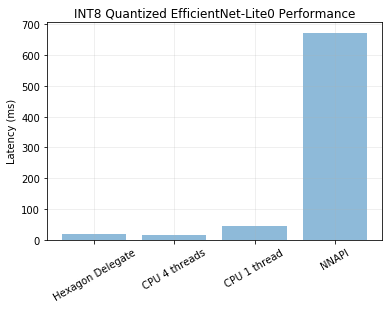

In [9]:
objects = ('Hexagon Delegate', 'CPU 4 threads', 'CPU 1 thread', 'NNAPI')
y_pos = np.arange(len(objects))
performance = [17.65, 13.79, 43.964, 673.35]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=30)
plt.ylabel('Latency (ms)')
plt.title('INT8 Quantized EfficientNet-Lite0 Performance')
plt.grid(linewidth=1, alpha=0.2)
plt.savefig('efficient_net_quant_perf.png', bbox_inches = "tight", dpi=250)
plt.show()

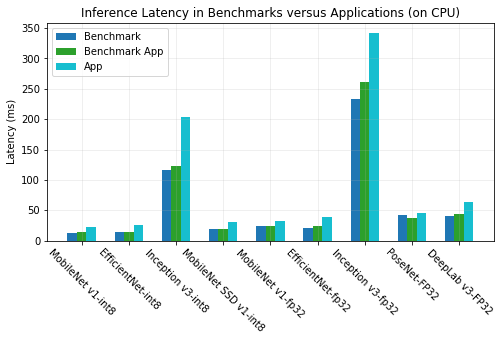

In [44]:
series_labels = ['Benchmark', 'Benchmark App', 'App']

inf_bench = [
12.88,
13.686,
116.485,
19.045,
24.412,
21.269,
233.567,
42.458,
39.928
]
inf_bench_app = [
13.4898,
14.2312,
123.243,
19.358,
24.1762,
23.1606,
261.616,
36.9345,
42.9766
]
inf_apps = [
22.99,
24.94,
202.83,
30.94,
31.81,
38.31,
341.25,
46.01,
63
]

data = [
    # Group 1
    inf_bench,

    # Group 2
    inf_bench_app,

    # Group 3
    inf_apps,
]

category_labels = [
'MobileNet v1-int8',
'EfficientNet-int8',
'Inception v3-int8',
'MobileNet SSD v1-int8',
'MobileNet v1-fp32',
'EfficientNet-fp32',
'Inception v3-fp32',
'PoseNet-FP32',
'DeepLab v3-FP32'
]

plot_bars(
    data, 
    series_labels,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:green', 'tab:cyan'],
    y_label="Latency (ms)",
    title = "Inference Latency in Benchmarks versus Applications (on CPU)",
    rotate = True
)

plt.savefig('bench_vs_apps_inference_cpu.png', bbox_inches = "tight", dpi=300)
plt.show()

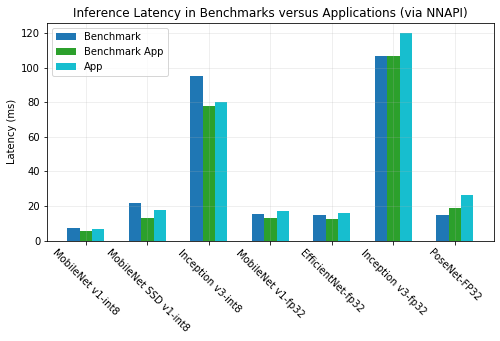

In [46]:
series_labels = ['Benchmark', 'Benchmark App', 'App']

inf_bench = [
6.964,
21.734,
95.016,
15.532,
14.697,
106.678,
14.716
]
inf_bench_app = [
5.76252,
13.0295,
77.5438,
12.8612,
12.1824,
106.446,
19.0071
]
inf_apps = [
6.94,
17.58,
80.06,
16.89,
16.16,
119.69,
26.19
]

data = [
    # Group 1
    inf_bench,

    # Group 2
    inf_bench_app,

    # Group 3
    inf_apps,
]

category_labels = [
'MobileNet v1-int8',
'MobileNet SSD v1-int8',
'Inception v3-int8',
'MobileNet v1-fp32',
'EfficientNet-fp32',
'Inception v3-fp32',
'PoseNet-FP32'
]

plot_bars(
    data, 
    series_labels,
    category_labels=category_labels,
    colors=['tab:blue', 'tab:green', 'tab:cyan'],
    y_label="Latency (ms)",
    title = "Inference Latency in Benchmarks versus Applications (via NNAPI)",
    rotate = True
)

plt.savefig('bench_vs_apps_inference_nnapi.png', bbox_inches = "tight", dpi=300)
plt.show()